<a href="https://colab.research.google.com/github/TofayelAhamedTopu/Machine_Learning/blob/main/Prayer_Activity_Recognition_Using_Smartphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prayer Activity Recognition using Smartphone</br>**
**Group Members** 
1. Tofayel Ahamed Topu</br>
   172-15-9676</br>
2. Md. Mahafuzar Rahman</br>
  172-15-9619</br>
3. Md. Sumon Hossain</br>
   172-15-9668</br>

**Supervised By** </br>
Mr. Ahmed Al Marouf</br>
Lecturer(Senior Scale)</br>
Department of CSE</br>
Daffodil International University</br>

# **Our phone rings during prayers which forces us to lose our focus. We are going to create a process to solve this problem.We will try to determine the activities of the prayers while performing the prayers**


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prayer Activity Recognition Using Smartphone/datafinal.csv')
df

,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,Activity,Label
0,-1.201795,-9.996614,0.222533,-0.007057,-0.007856,-0.008655,-21.154800,42.516998,-12.663600,Takbeer,A
1,-1.220938,-10.008579,0.244068,0.005726,-0.005726,-0.005459,-21.167000,42.553600,-12.761200,Takbeer,A
2,-1.161117,-10.057034,0.193819,0.020639,0.009188,-0.001198,-21.191401,42.577999,-12.956400,Takbeer,A
3,-1.173081,-9.970294,0.296710,0.024900,-0.002530,0.005193,-21.191401,42.577999,-12.907599,Takbeer,A
4,-1.002593,-9.975080,0.234497,0.040878,-0.025965,0.021172,-21.227999,42.565800,-12.895400,Takbeer,A
...,...,...,...,...,...,...,...,...,...,...,...
18084,1.325624,-9.915258,-0.984646,-0.011318,0.040346,-0.029960,28.840799,46.396599,28.072199,Sijdah_two,H
18085,1.466800,-10.008579,-0.922433,-0.018775,0.032889,-0.015046,28.840799,46.469799,27.998999,Sijdah_two,H
18086,1.387837,-10.022936,-0.809970,-0.024101,-0.012916,-0.020373,28.852999,46.530800,27.974600,Sijdah_two,H
18087,1.246661,-9.970294,-1.099502,-0.018775,-0.034221,-0.024634,28.914000,46.591801,27.950199,Sijdah_two,H


In [ ]:
#add index column
df['index'] = np.arange(df.shape[0])
df.head()

,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,Activity,Label,index
0,-1.201795,-9.996614,0.222533,-0.007057,-0.007856,-0.008655,-21.154800,42.516998,-12.663600,Takbeer,A,0
1,-1.220938,-10.008579,0.244068,0.005726,-0.005726,-0.005459,-21.167000,42.553600,-12.761200,Takbeer,A,1
2,-1.161117,-10.057034,0.193819,0.020639,0.009188,-0.001198,-21.191401,42.577999,-12.956400,Takbeer,A,2
3,-1.173081,-9.970294,0.296710,0.024900,-0.002530,0.005193,-21.191401,42.577999,-12.907599,Takbeer,A,3
4,-1.002593,-9.975080,0.234497,0.040878,-0.025965,0.021172,-21.227999,42.565800,-12.895400,Takbeer,A,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18089 entries, 0 to 18088
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Acc_X      18089 non-null  float64
 1   Acc_Y      18089 non-null  float64
 2   Acc_Z      18089 non-null  float64
 3   Gyro_X     18089 non-null  float64
 4   Gyro_Y     18089 non-null  float64
 5   Gyro_Z     18089 non-null  float64
 6   Mag_X      18089 non-null  float64
 7   Mag_Y      18089 non-null  float64
 8   Mag_Z      18089 non-null  float64
 9   Activity   18089 non-null  object 
 10  Label      18089 non-null  object 
 11  index      18089 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
df['Label'].value_counts()

B    7738
H    3062
F    2638
D    2010
A    1168
C     651
E     557
G     265
Name: Label, dtype: int64

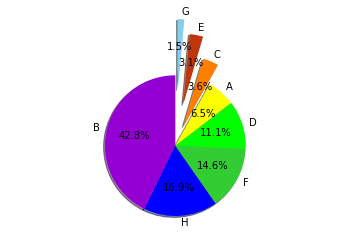

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
labels = 'B','H','F','D','A','C','E','G'
sizes = [7738,3062,2638,2010,1168,651,557,265]
colors = ['#9400D3','#0000FF','#32CD32','#00FF00','#FFFF00','#FF7F00','#BF360C','#87CEEB']	#87CEEB#3E2723
explode = (0,0,0.0,0.0,0,.3,.6,.8)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)

plt.axis('equal')
plt.show()
plt.savefig('chart.png')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Label"] = le.fit_transform(df["Label"])
le.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [ ]:
Acc_scaling = df.iloc[:, 0:3]
Gyro_scaling = df.iloc[:, 3:6]
Mag_scaling = df.iloc[:, 6:9]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_dfAcc = ss.fit_transform(Acc_scaling)
scaled_dfGyro = ss.fit_transform(Gyro_scaling)
scaled_dfMag = ss.fit_transform(Mag_scaling)
scaled_dfAcc = pd.DataFrame(scaled_dfAcc, columns = ['Acc_X', 'Acc_Y', 'Acc_Z'])
scaled_dfGyro = pd.DataFrame(scaled_dfGyro, columns = ['Gyro_X', 'Gyro_Y', 'Gyro_Z'])
scaled_dfMag = pd.DataFrame(scaled_dfMag, columns = ['Mag_X', 'Mag_Y', 'Mag_Z'])

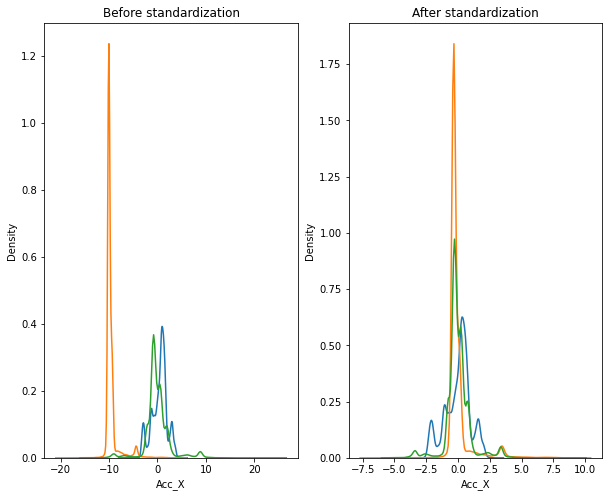

In [ ]:
# Plot and visualize the results
import seaborn as sns
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before standardization')
sns.kdeplot(Acc_scaling['Acc_X'], ax=ax1)
sns.kdeplot(Acc_scaling['Acc_Y'], ax=ax1)
sns.kdeplot(Acc_scaling['Acc_Z'], ax=ax1)

ax2.set_title('After standardization')
sns.kdeplot(scaled_dfAcc['Acc_X'], ax=ax2)
sns.kdeplot(scaled_dfAcc['Acc_Y'], ax=ax2)
sns.kdeplot(scaled_dfAcc['Acc_Z'], ax=ax2)
plt.show()

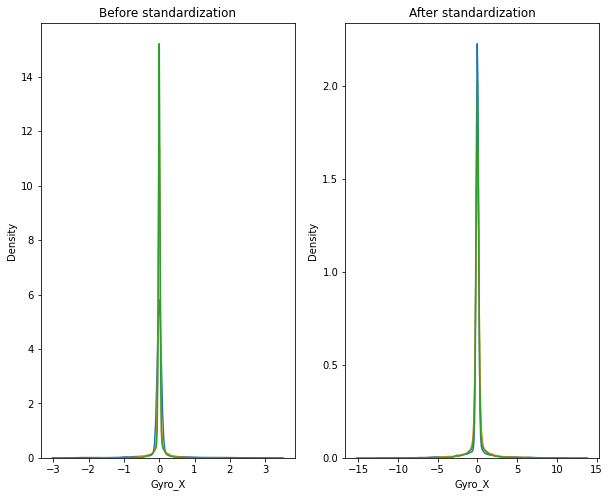

In [ ]:
# Plot and visualize the results
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before standardization')
sns.kdeplot(Gyro_scaling['Gyro_X'], ax=ax1)
sns.kdeplot(Gyro_scaling['Gyro_Y'], ax=ax1)
sns.kdeplot(Gyro_scaling['Gyro_Z'], ax=ax1)

ax2.set_title('After standardization')
sns.kdeplot(scaled_dfGyro['Gyro_X'], ax=ax2)
sns.kdeplot(scaled_dfGyro['Gyro_Y'], ax=ax2)
sns.kdeplot(scaled_dfGyro['Gyro_Z'], ax=ax2)
plt.show()

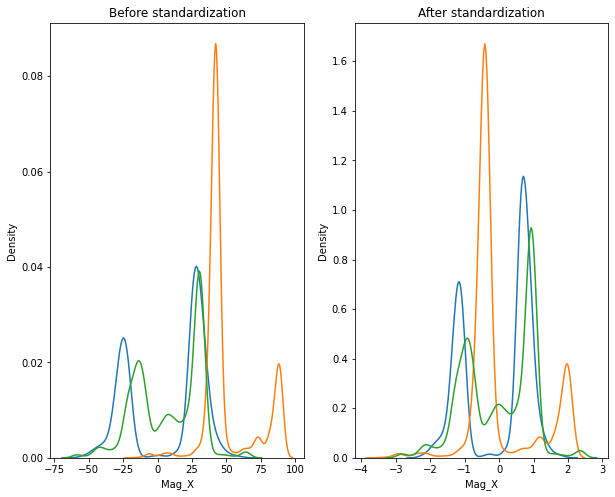

In [ ]:
# Plot and visualize the results
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before standardization')
sns.kdeplot(Mag_scaling['Mag_X'], ax=ax1)
sns.kdeplot(Mag_scaling['Mag_Y'], ax=ax1)
sns.kdeplot(Mag_scaling['Mag_Z'], ax=ax1)

ax2.set_title('After standardization')
sns.kdeplot(scaled_dfMag['Mag_X'], ax=ax2)
sns.kdeplot(scaled_dfMag['Mag_Y'], ax=ax2)
sns.kdeplot(scaled_dfMag['Mag_Z'], ax=ax2)
plt.show()

In [ ]:
df1=scaled_dfAcc.join(scaled_dfGyro).join(scaled_dfMag).join(df['Label'])

In [ ]:
df2=df1.copy()
df2['index'] = np.arange(df2.shape[0])
df2.head()

,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,Label,index
0,-1.035972,-0.308142,0.103251,-0.019966,-0.054607,-0.067618,-1.040067,-0.402074,-0.884047,0,0
1,-1.047965,-0.316174,0.111387,0.013403,-0.039850,-0.043536,-1.040499,-0.400172,-0.888163,0,1
2,-1.010486,-0.348702,0.092404,0.052332,0.063450,-0.011425,-1.041362,-0.398905,-0.896394,0,2
3,-1.017982,-0.290473,0.131273,0.063455,-0.017714,0.036740,-1.041362,-0.398905,-0.894336,0,3
4,-0.911167,-0.293686,0.107771,0.105165,-0.180043,0.157152,-1.042656,-0.399538,-0.893822,0,4


## Data Visualization

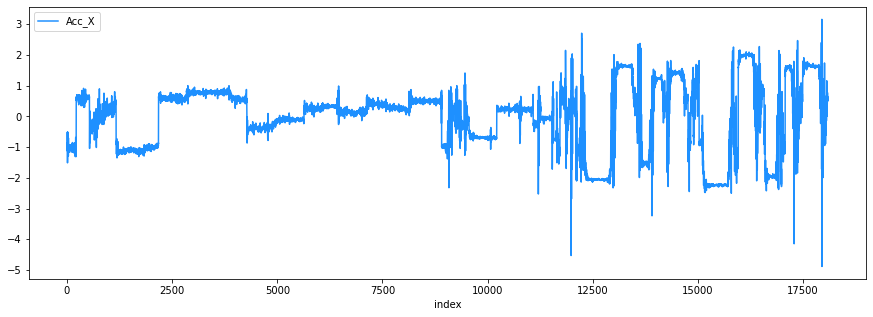

In [ ]:
df2.plot.line(x='index',y=(['Acc_X']),figsize=(15,5),color='#1E90FF')

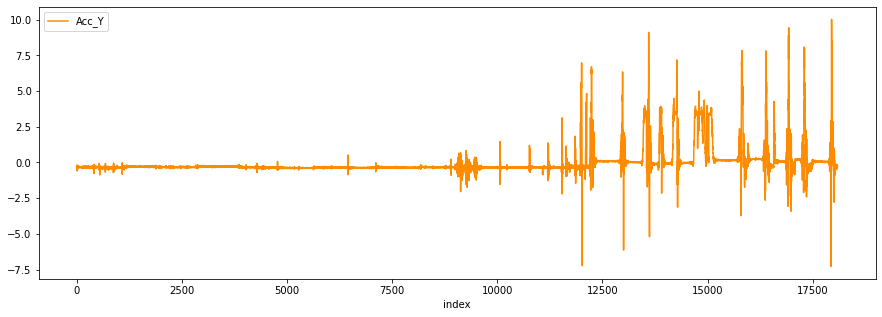

In [ ]:
df2.plot.line(x='index',y=(['Acc_Y']),figsize=(15,5),color='#FF8C00')

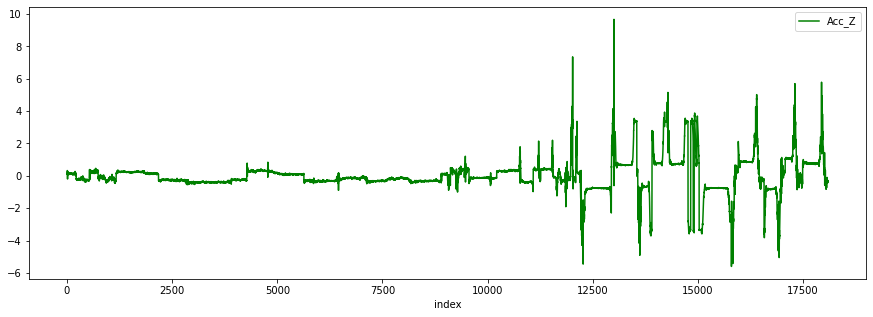

In [ ]:
df2.plot.line(x='index',y=(['Acc_Z']),figsize=(15,5),color='#008000')

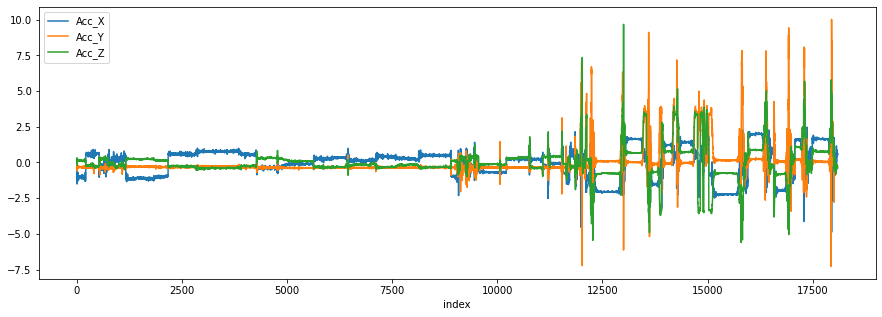

In [ ]:
#vusualization in accellerometer x,y,z axis data
df2.plot.line(x='index',y=(['Acc_X','Acc_Y','Acc_Z']),figsize=(15,5))

Gyroscope data visualization use plot line

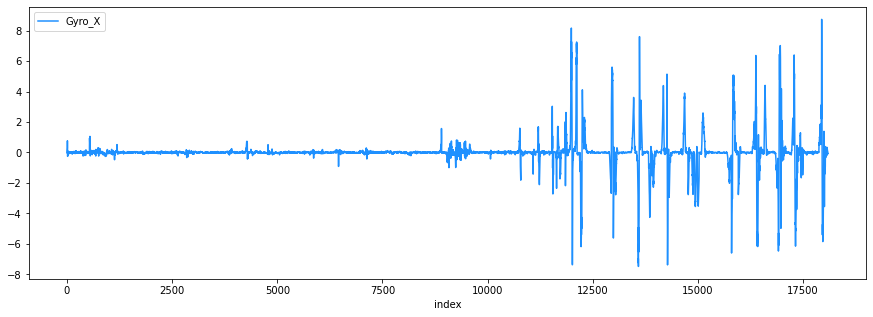

In [ ]:
df2.plot.line(x='index',y=(['Gyro_X']),figsize=(15,5),color='#1E90FF')

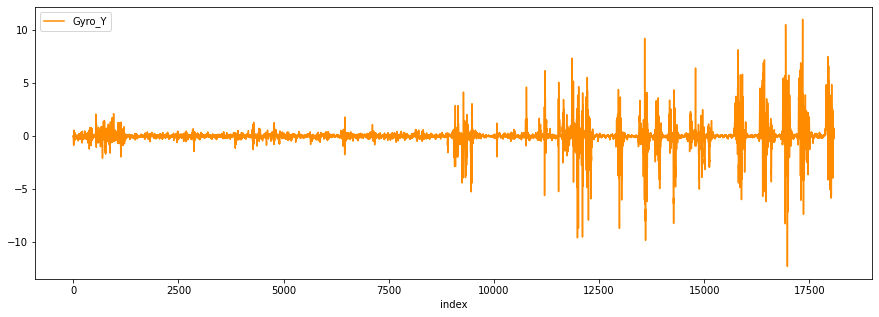

In [ ]:
df2.plot.line(x='index',y=(['Gyro_Y']),figsize=(15,5),color='#FF8C00')

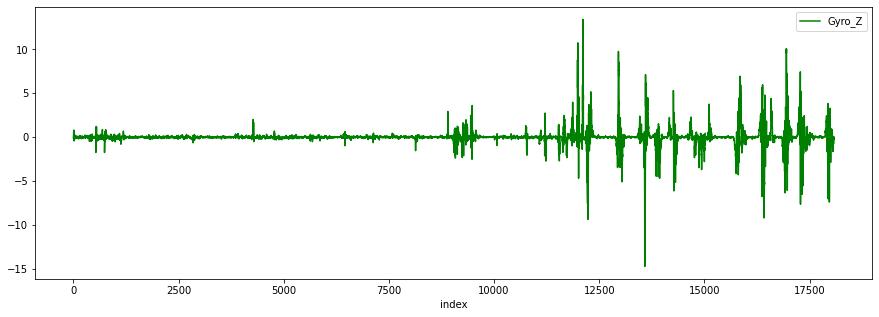

In [ ]:
df2.plot.line(x='index',y=(['Gyro_Z']),figsize=(15,5),color='#008000')

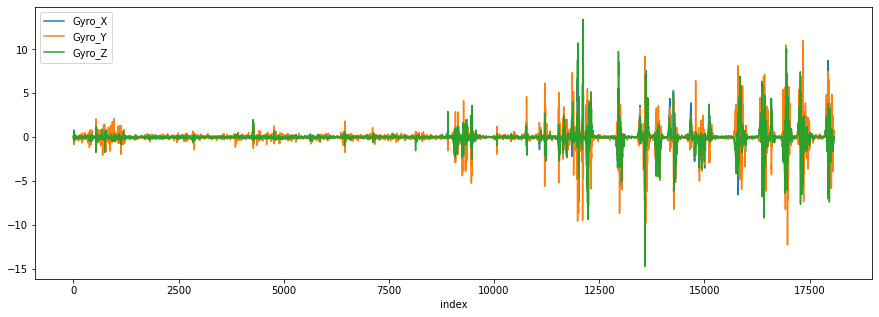

In [ ]:
df2.plot.line(x='index',y=(['Gyro_X','Gyro_Y','Gyro_Z']),figsize=(15,5))

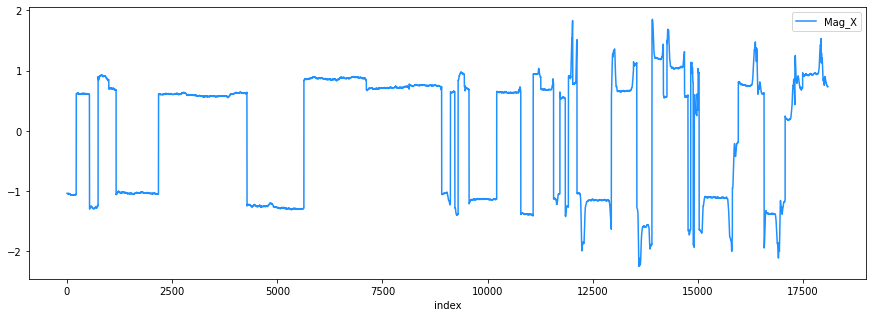

In [ ]:
df2.plot.line(x='index',y=(['Mag_X']),figsize=(15,5),color='#1E90FF')

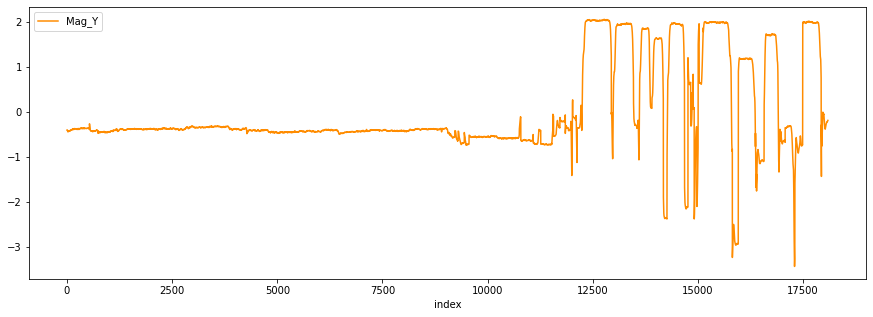

In [ ]:
df2.plot.line(x='index',y=(['Mag_Y']),figsize=(15,5),color='#FF8C00')

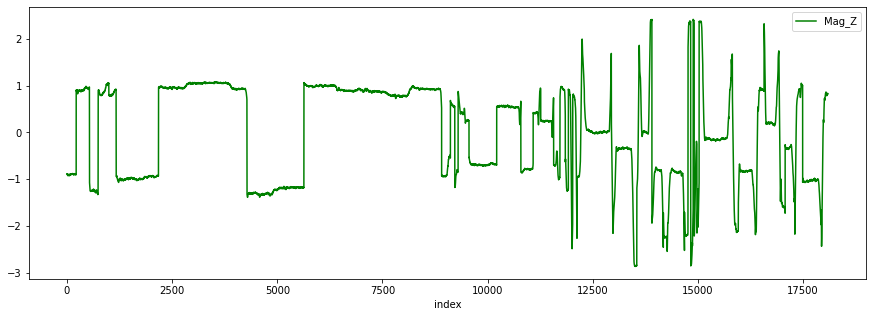

In [ ]:
df2.plot.line(x='index',y=(['Mag_Z']),figsize=(15,5),color='#008000')

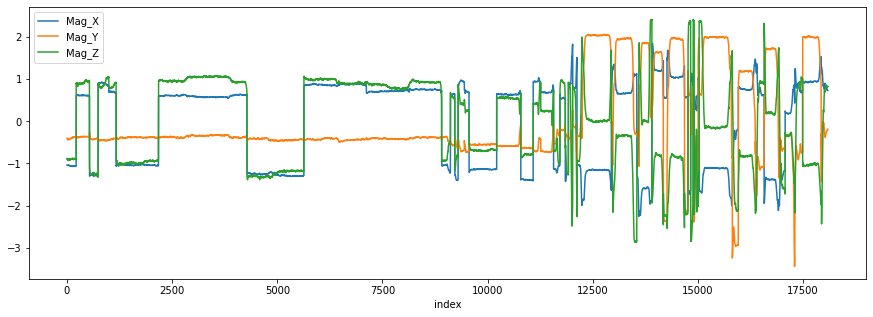

In [ ]:
df2.plot.line(x='index',y=(['Mag_X','Mag_Y','Mag_Z']),figsize=(15,5))

## 3D Scatter Plot for individual activities

No handles with labels found to put in legend.


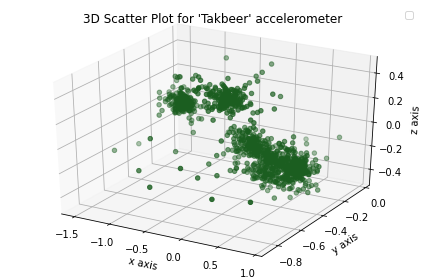

In [ ]:
#Here visualize (Takbeer) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==0]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1B5E20')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Takbeer' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


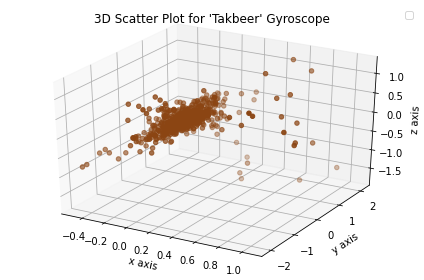

In [ ]:
#Here visualize (Takbeer) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==0]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#8B4513')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Takbeer' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


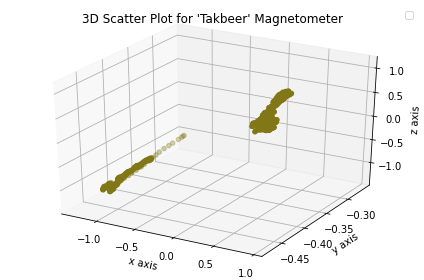

In [ ]:
#Here visualize (Takbeer) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==0]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#827717')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Takbeer' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


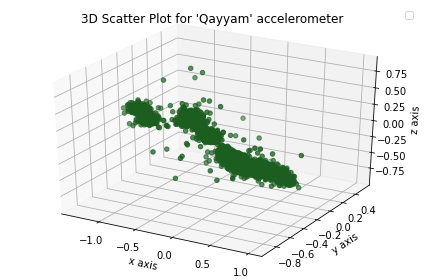

In [ ]:
#Here visualize (Qayyam) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==1]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1B5E20')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Qayyam' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


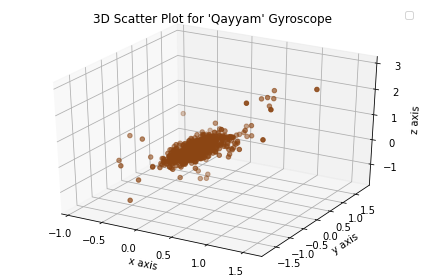

In [ ]:
#Here visualize (Qayyam) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==1]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#8B4513')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Qayyam' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


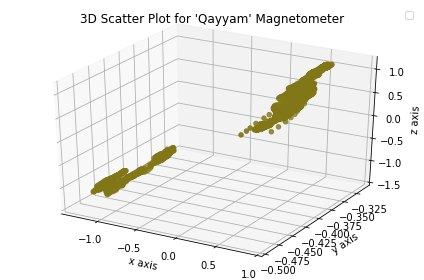

In [ ]:
#Here visualize (Qayyam) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==1]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#827717')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Qayyam' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


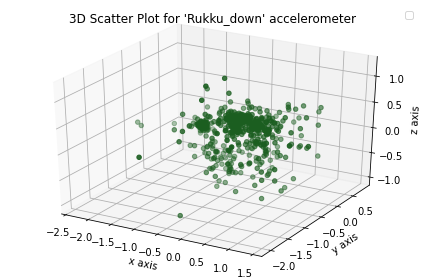

In [ ]:
#Here visualize (Rukku_down) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==2]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1B5E20')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Rukku_down' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


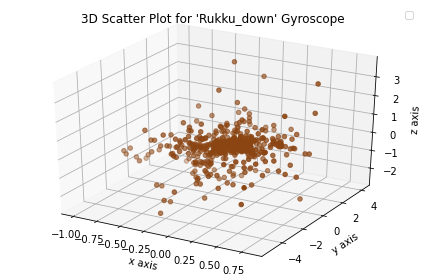

In [ ]:
#Here visualize (Rukku_down) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==2]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#8B4513')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Rukku_down' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


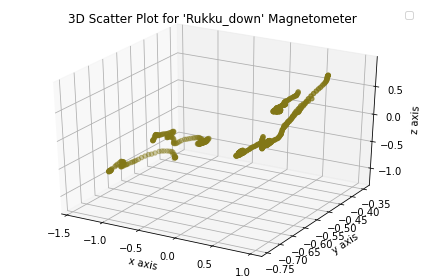

In [ ]:
#Here visualize (Rukku_down) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==2]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#827717')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Rukku_down' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


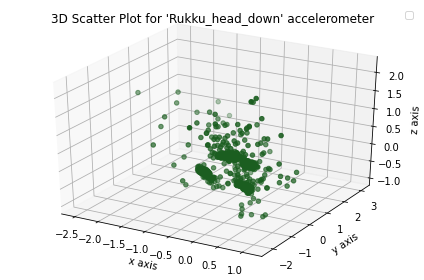

In [ ]:
#Here visualize (Rukku_head_down) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==3]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1B5E20')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Rukku_head_down' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


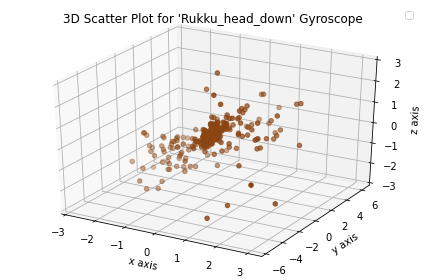

In [ ]:
#Here visualize (Rukku_head_down) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==3]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#8B4513')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Rukku_head_down' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


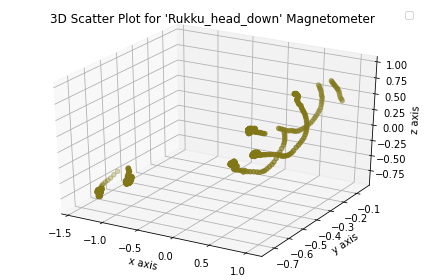

In [ ]:
#Here visualize (Rukku_head_down) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==3]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#827717')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Rukku_head_down' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


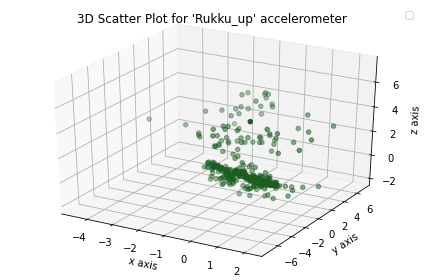

In [ ]:
#Here visualize (Rukku_up) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==4]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1B5E20')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Rukku_up' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


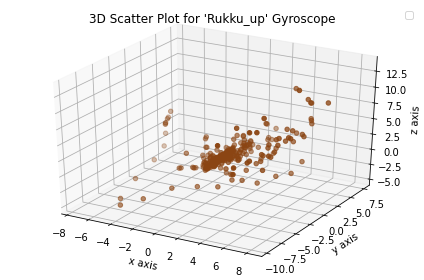

In [ ]:
#Here visualize (Rukku_up) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==4]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#8B4513')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Rukku_up' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


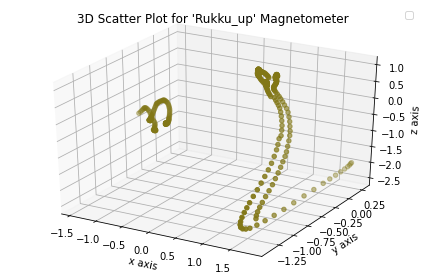

In [ ]:
#Here visualize (Rukku_up) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==4]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#827717')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Rukku_up' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


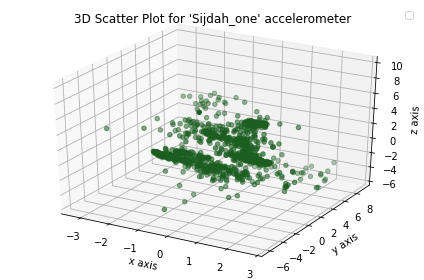

In [ ]:
#Here visualize (Sijdah_one) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==5]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1B5E20')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Sijdah_one' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


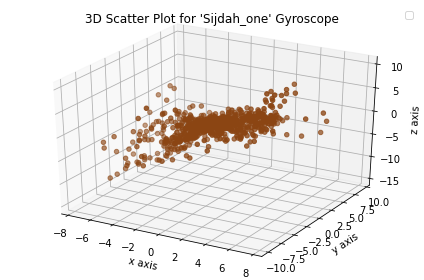

In [ ]:
#Here visualize (Sijdah_one ) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==5]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#8B4513')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Sijdah_one' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


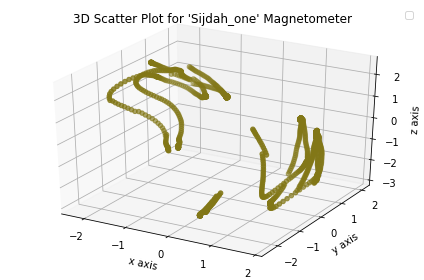

In [ ]:
#Here visualize (Sijdah_one) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==5]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#827717')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Sijdah_one' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


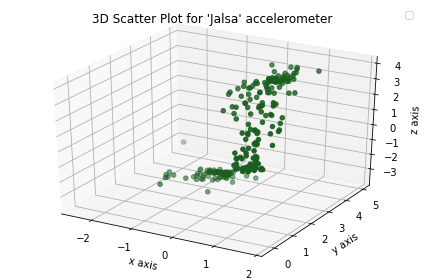

In [ ]:
#Here visualize (Jalsa) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==6]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1B5E20')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Jalsa' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


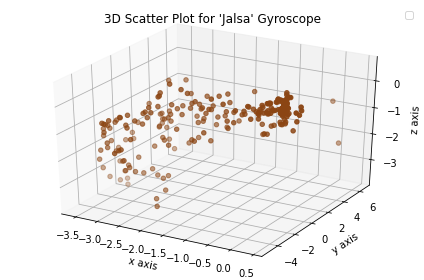

In [ ]:
#Here visualize (Jalsa) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==6]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#8B4513')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Jalsa' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


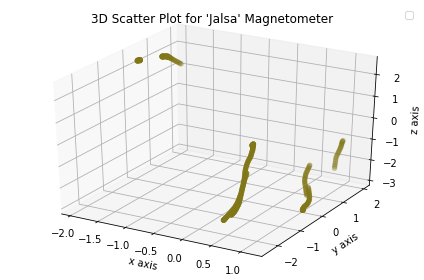

In [ ]:
#Here visualize (Jalsa) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==6]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#827717')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Jalsa' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


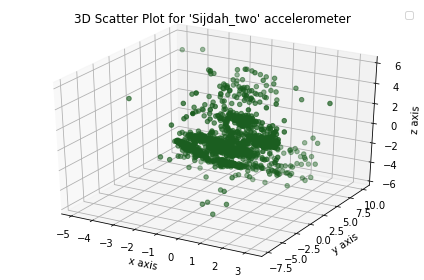

In [ ]:
#Here visualize (Sijdah_two) accelerometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==7]
x = dff['Acc_X']
y = dff['Acc_Y']
z = dff['Acc_Z']
ax.scatter( x, y, z, c='#1B5E20')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Sijdah_two' accelerometer")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


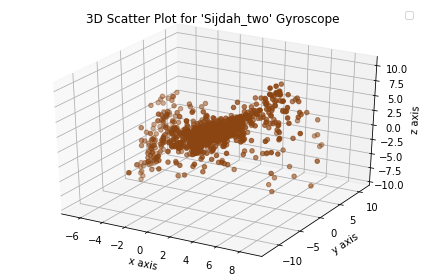

In [ ]:
#Here visualize (Sijdah_two) Gyroscope data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==7]
x = dff['Gyro_X']
y = dff['Gyro_Y']
z = dff['Gyro_Z']

ax.scatter( x, y, z, c='#8B4513')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Sijdah_two' Gyroscope")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


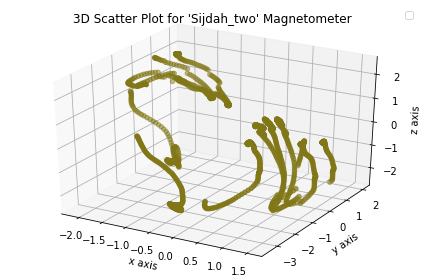

In [ ]:
#Here visualize (Sijdah_two) Magnetometer data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
df3=df2.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
dff=df3[df3['Label']==7]
x = dff['Mag_X']
y = dff['Mag_Y']
z = dff['Mag_Z']

ax.scatter( x, y, z, c='#827717')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot for 'Sijdah_two' Magnetometer")
plt.legend()
plt.tight_layout()
plt.show()

## Split Dataset & Scalling

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost
from sklearn.metrics import classification_report

In [ ]:
train, test = train_test_split(df, test_size=0.2)

In [ ]:
x_train = train.iloc[:, :-3]
y_train = train["Label"]
x_test = test.iloc[:, :-3]
y_test = test["Label"]

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

# Creating a Dictionaire
model_accuracy = {}

In [ ]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, digits=4))

## K-Nearest Neighbors(KNN)

In [ ]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.019071310116086235 occurs at k=1.


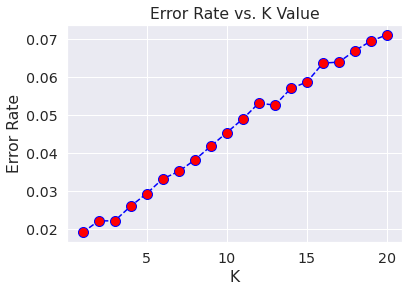

In [ ]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
cmknn = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print( "KNN: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['KNN'] = metrics.accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           A     0.9442    0.9053    0.9244       243
           B     0.9833    0.9864    0.9849      1549
           C     0.9055    0.9350    0.9200       123
           D     0.9876    0.9925    0.9900       400
           E     0.9106    0.9739    0.9412       115
           F     0.9883    0.9844    0.9864       514
           G     1.0000    0.8772    0.9346        57
           H     0.9887    0.9887    0.9887       617

    accuracy                         0.9779      3618
   macro avg     0.9635    0.9554    0.9588      3618
weighted avg     0.9781    0.9779    0.9778      3618

KNN: 0.9778883360972913


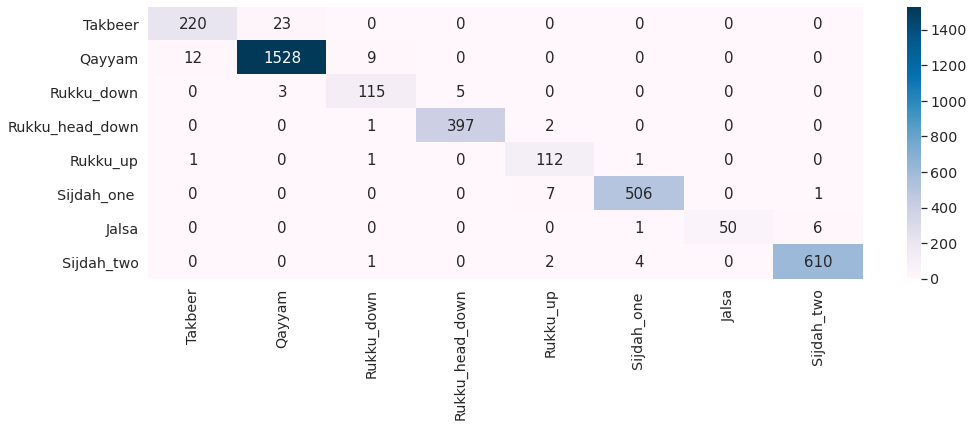

In [ ]:
hmknn = pd.DataFrame(cmknn, 
    index=['Takbeer', 'Qayyam', 'Rukku_down', 'Rukku_head_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'], 
    columns=['Takbeer', 'Qayyam', 'Rukku_down', 'Rukku_head_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'],)
plt.figure(figsize = (16,5))
sn.set(font_scale=1.3)
sn.heatmap(hmknn, annot=True,annot_kws={"size":15},fmt='d',cmap="PuBu")

## Naive Bayes

In [ ]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
cmnb = confusion_matrix(y_test, y_pred)
print( "Naive Bayes: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Naive Bayes'] = metrics.accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0     0.4567    0.2320    0.3077       250
           1     0.8645    0.9577    0.9087      1512
           2     0.3118    0.2320    0.2661       125
           3     0.7699    0.9200    0.8383       400
           4     0.2975    0.3429    0.3186       105
           5     0.5326    0.7220    0.6130       554
           6     0.3065    0.6786    0.4222        56
           7     0.6867    0.2776    0.3954       616

    accuracy                         0.7043      3618
   macro avg     0.5283    0.5453    0.5087      3618
weighted avg     0.7006    0.7043    0.6798      3618

Naive Bayes: 0.7042564953012714


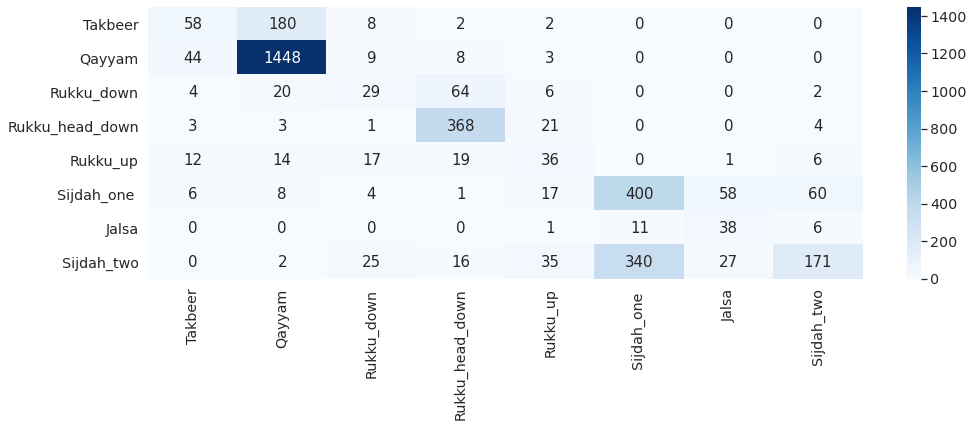

In [ ]:
hmnb = pd.DataFrame(cmnb, 
    index=['Takbeer', 'Qayyam', 'Rukku_down', 'Rukku_head_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'], 
    columns=['Takbeer', 'Qayyam', 'Rukku_down', 'Rukku_head_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'],)
plt.figure(figsize = (16,5))
sn.set(font_scale=1.3)
sn.heatmap(hmnb, annot=True,annot_kws={"size":15},fmt='d',cmap="Blues")

## Random Forest Classifier

In [ ]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.022940851299060254 occurs at n=81.


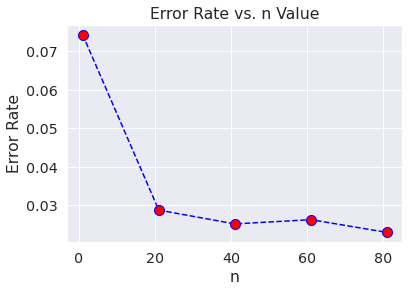

In [ ]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [ ]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)

cmrf = confusion_matrix(y_test, y_pred)

print( "Random Forest: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['Random Forest'] = metrics.accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0     0.9528    0.8880    0.9193       250
           1     0.9785    0.9947    0.9866      1512
           2     0.9565    0.8800    0.9167       125
           3     0.9653    0.9750    0.9701       400
           4     0.9266    0.9619    0.9439       105
           5     0.9892    0.9874    0.9883       554
           6     0.9815    0.9464    0.9636        56
           7     0.9918    0.9870    0.9894       616

    accuracy                         0.9771      3618
   macro avg     0.9678    0.9526    0.9597      3618
weighted avg     0.9770    0.9771    0.9768      3618

Random Forest: 0.9770591487009398


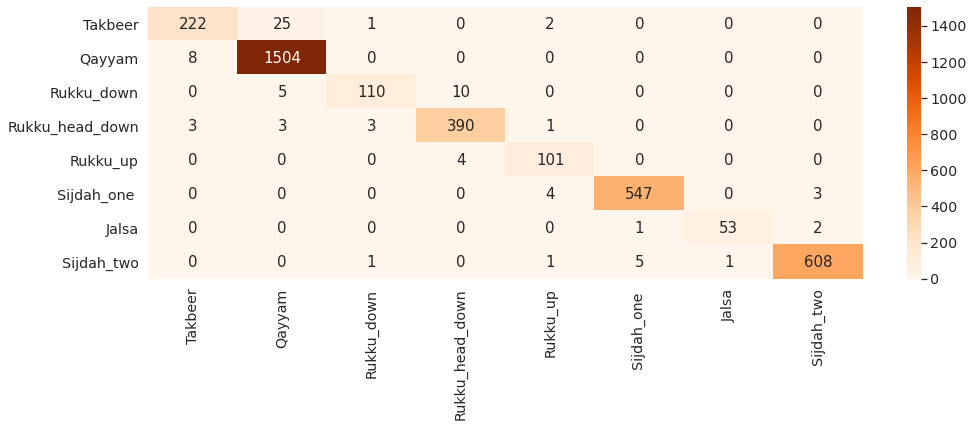

In [ ]:
hmrf = pd.DataFrame(cmrf, 
    index=['Takbeer', 'Qayyam', 'Rukku_down', 'Rukku_head_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'], 
    columns=['Takbeer', 'Qayyam', 'Rukku_down', 'Rukku_head_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'],)
plt.figure(figsize = (16,5))
sn.set(font_scale=1.3)
sn.heatmap(hmrf, annot=True,annot_kws={"size":15},fmt='d',cmap="Oranges")

## Support Vector Machine(SVM)

In [ ]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [ ]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [ ]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.7840508603413724
rbf  out-of-sample accuracy in SVM:  0.7747374239911553
poly  in-sample accuracy in SVM:  0.7463893303849077
poly  out-of-sample accuracy in SVM:  0.7346600331674958
linear  in-sample accuracy in SVM:  0.7123211941123626
linear  out-of-sample accuracy in SVM:  0.6898839137645107
Highest accuracy is 0.7747374239911553 occurs at rbf kernel.


In [ ]:
k

'rbf'

Lowest error is 0.16943062465450526 occurs at C=9.


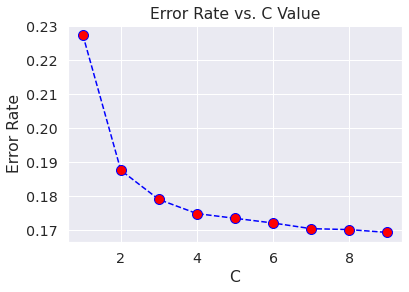

In [ ]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [ ]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
cmsvm = confusion_matrix(y_test, y_pred)
print( "SVM: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['SVM'] = metrics.accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       250
           1     0.8136    0.9987    0.8967      1512
           2     1.0000    0.0080    0.0159       125
           3     0.7564    0.9550    0.8442       400
           4     0.5729    0.5238    0.5473       105
           5     0.9232    0.8899    0.9062       554
           6     0.6591    0.5179    0.5800        56
           7     0.9337    0.8685    0.8999       616

    accuracy                         0.8306      3618
   macro avg     0.7074    0.5952    0.5863      3618
weighted avg     0.7853    0.8306    0.7855      3618

SVM: 0.8305693753454948


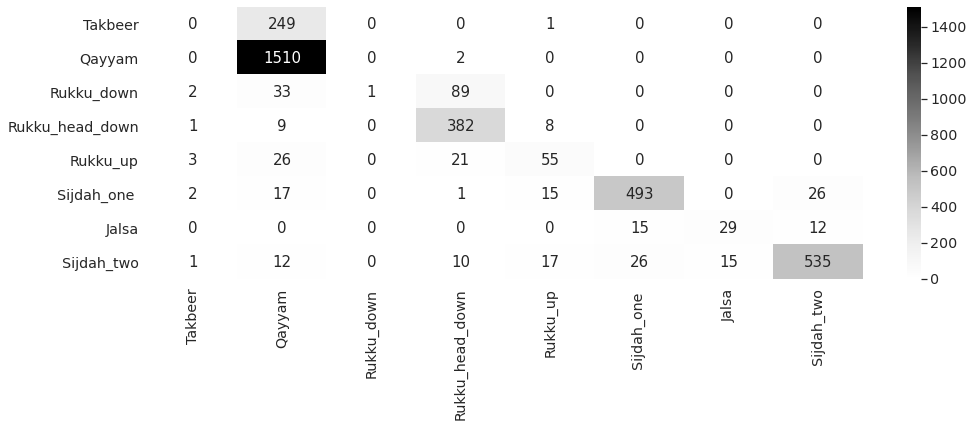

In [ ]:
hmsvm = pd.DataFrame(cmsvm, 
    index=['Takbeer', 'Qayyam', 'Rukku_down', 'Rukku_head_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'], 
    columns=['Takbeer', 'Qayyam', 'Rukku_down', 'Rukku_head_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'],)
plt.figure(figsize = (16,5))
sn.set(font_scale=1.3)
sn.heatmap(hmsvm, annot=True,annot_kws={"size":15},fmt='d',cmap="Greys")

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
cmgb = confusion_matrix(y_test, y_pred)
print( "GrBoosting: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['GrBoosting'] = metrics.accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0     0.9224    0.8080    0.8614       250
           1     0.9589    0.9881    0.9733      1512
           2     0.8468    0.7520    0.7966       125
           3     0.9505    0.9600    0.9552       400
           4     0.8411    0.8571    0.8491       105
           5     0.9545    0.9458    0.9501       554
           6     0.9348    0.7679    0.8431        56
           7     0.9423    0.9545    0.9484       616

    accuracy                         0.9450      3618
   macro avg     0.9189    0.8792    0.8972      3618
weighted avg     0.9443    0.9450    0.9441      3618

GrBoosting: 0.9449972360420121


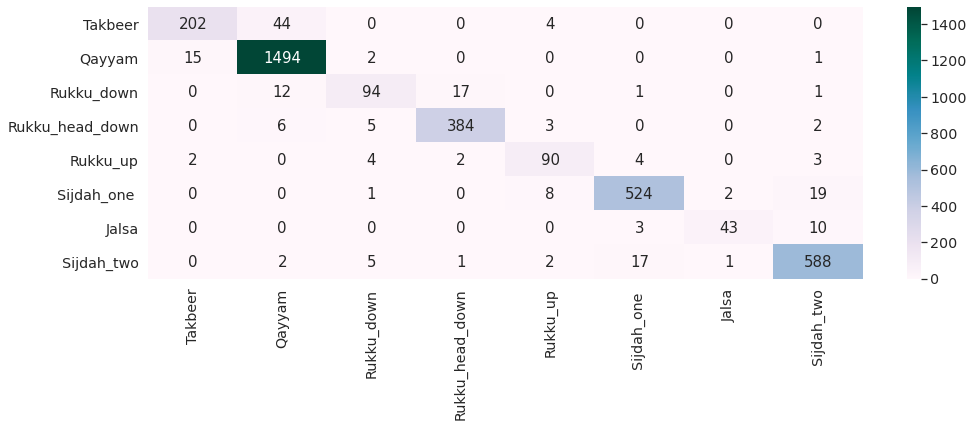

In [ ]:
hmgb = pd.DataFrame(cmgb, 
    index=['Takbeer', 'Qayyam', 'Rukku_down', 'Rukku_head_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'], 
    columns=['Takbeer', 'Qayyam', 'Rukku_down', 'Rukku_head_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'],)
plt.figure(figsize = (16,5))
sn.set(font_scale=1.3)
sn.heatmap(hmgb, annot=True,annot_kws={"size":15},fmt='d',cmap="PuBuGn")

## XGB Classifier

In [ ]:
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)
cmxg = confusion_matrix(y_test, y_pred)
print( "XGBoost: {}".format(metrics.accuracy_score(y_test,y_pred)) )

model_accuracy['XGBoost'] = metrics.accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0     0.9032    0.5600    0.6914       250
           1     0.9181    0.9934    0.9543      1512
           2     0.8539    0.6080    0.7103       125
           3     0.9183    0.9550    0.9363       400
           4     0.7864    0.7714    0.7788       105
           5     0.9348    0.9314    0.9331       554
           6     0.8810    0.6607    0.7551        56
           7     0.9200    0.9334    0.9267       616

    accuracy                         0.9146      3618
   macro avg     0.8895    0.8017    0.8357      3618
weighted avg     0.9134    0.9146    0.9096      3618

XGBoost: 0.9145936981757877


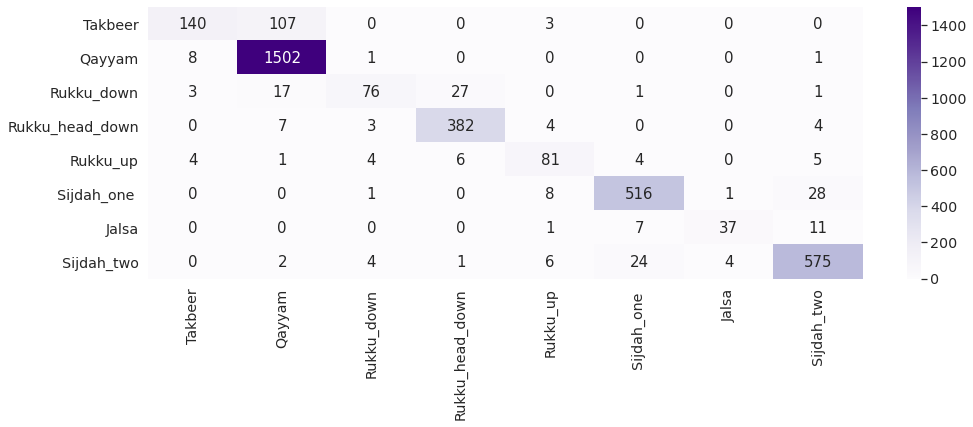

In [ ]:
hmxg = pd.DataFrame(cmxg, 
    index=['Takbeer', 'Qayyam', 'Rukku_down', 'Rukku_head_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'], 
    columns=['Takbeer', 'Qayyam', 'Rukku_down', 'Rukku_head_down', 'Rukku_up', 'Sijdah_one ', 'Jalsa', 'Sijdah_two'],)
plt.figure(figsize = (16,5))
sn.set(font_scale=1.3)
sn.heatmap(hmxg, annot=True,annot_kws={"size":15},fmt='d',cmap="Purples")

## All Model accuracy

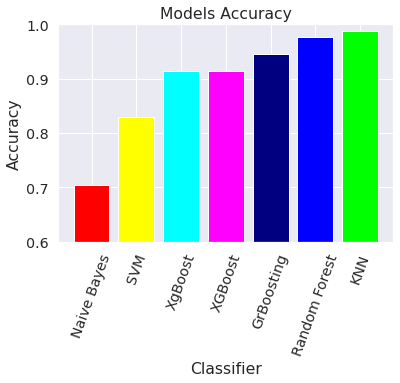

In [ ]:
#Models Accuracy             
from collections import OrderedDict
model_accuracy = OrderedDict(sorted(model_accuracy.items(), key=lambda t: t[1]))
plt.bar(range(len(model_accuracy)), model_accuracy.values(),align='center', color=['#FF0000', '#FFFF00', '#00FFFF', '#FF00FF', '#000080', '#0000FF', '#00FF00'])
plt.xticks(range(len(model_accuracy)), model_accuracy.keys(), rotation =70)
axes = plt.gca()
axes.set_ylim([.6,1.0])
plt.xlabel('Classifier') 
plt.ylabel('Accuracy')
plt.title("Models Accuracy")
plt.show()

## Features Ranking


In [ ]:
X = df.iloc[:, : -3].values

y = df.iloc[:, 10].values

In [ ]:
#Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=250, criterion='entropy',random_state=0)
classifier.fit(x_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(x_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Calculating the Performance of Random Forest Classification
from sklearn import metrics
print( "Accuracy of Random Forest Classification: {}".format(metrics.accuracy_score(y_test,y_pred)) )

Accuracy of Random Forest Classification: 0.9812050856826976


In [ ]:
#Feature Importances               
header = list(df)

classifier.fit(x_train, y_train)
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1] # list in reverse order

#Print the feature ranking
print("Feature ranking:")
header1 = []
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, header[indices[f]], importances[indices[f]]))
    header1.append(header[indices[f]])

Feature ranking:
1. Feature Mag_Y (0.312701)
2. Feature Mag_Z (0.172806)
3. Feature Acc_Y (0.162415)
4. Feature Mag_X (0.096941)
5. Feature Acc_Z (0.088668)
6. Feature Acc_X (0.065773)
7. Feature Gyro_X (0.040217)
8. Feature Gyro_Y (0.035075)
9. Feature Gyro_Z (0.025404)


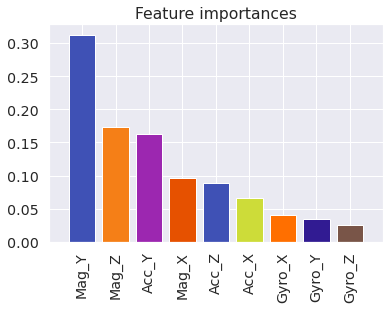

In [ ]:
# Plot the feature importances of the forest with Material Design
import random 
colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#3F51B5', '#2196F3',
          '#03A9F4' ,'#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B',
          '#FFC107', '#FF9800', '#FF5722', '#795548', '#607D8B', '#B71C1C', '#880E4F',
          '#4A148C', '#311B92', '#1A237E', '#0D47A1', '#01579B', '#006064', '#004D40',
          '#1B5E20', '#33691E', '#827717', '#F57F17', '#FF6F00', '#E65100', '#BF360C',
          '#3E2723', '#212121', '#607D8B']

random_colors = random.sample(colors,20)

plt.figure()

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color=random_colors, align="center")
plt.xticks(range(X.shape[1]),header1, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()